In [13]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [48]:
def read_file(filename):
    times = {
        "openblas" : [],
        "omp_1" : [],
        "omp_2" : [],
        "simple" : [],
        "mkl" : [],
    }
    gflops = {
        "openblas" : [],
        "omp_1" : [],
        "omp_2" : [],
        "simple" : [],
        "mkl" : [],
    }
    offset_lines = 12
    with open(filename, 'r') as f:
        for j in range (offset_lines):
            f.readline()
        for i in range(3):
            f.readline()
            f.readline()
            line = f.readline().split()
            times["openblas"].append(line[0])
            gflops["openblas"].append(line[1])
            line = f.readline().split()
            times["omp_1"].append(line[0])
            gflops["omp_1"].append(line[1])
            line = f.readline().split()
            times["omp_2"].append(line[0])
            gflops["omp_2"].append(line[1])
            line = f.readline().split()
            times["simple"].append(line[0])
            gflops["simple"].append(line[1])
            f.readline()
            f.readline()
            line = f.readline().split()
            times["mkl"].append(line[0])
            gflops["mkl"].append(line[1])
            f.readline()
            f.readline()
            f.readline()

    return times, gflops


In [49]:
import numpy as np
def read_logs(log_fmt, threads_arr):
    res_ = []
    for n_thr in threads_arr:
        res_.append(read_file(log_fmt.format(n_thr)))
    
    keys = ["openblas", "omp_1", "omp_2", "simple", "mkl"]

    res  = {
        "mkl" : [],
        "openblas" : [],
        "omp_2" : [],
        "omp_1" : [],
        "simple" : [],
    }
    res = {
        "time" : res,
        "gflops" : copy.deepcopy(res)
    }

    for key in keys:
        for i in range(3): # iter over matrix sizes
            arr_t = []
            arr_flops = []
            for j in range(len(threads_arr)): # iter over threads
                arr_t.append(float(res_[j][0][key][i]))
                arr_flops.append(float(res_[j][1][key][i]))

            res["time"][key].append(np.array(arr_t))
            res["gflops"][key].append(np.array(arr_flops))
    
    

    return res

In [50]:
fmt = "blas_dgemm_{}.log"
threads_arr = [1, 2, 4, 8, 16]
mat_sizes = [500, 1000, 1500]
res = read_logs(fmt, threads_arr)

In [51]:
res

{'time': {'mkl': [array([0.004858, 0.006503, 0.013999, 0.002159, 0.014249]),
   array([0.034623, 0.028527, 0.016143, 0.009397, 0.008758]),
   array([0.10819 , 0.083284, 0.045961, 0.02575 , 0.018423])],
  'openblas': [array([0.005084, 0.010947, 0.002512, 0.001565, 0.002364]),
   array([0.033626, 0.025833, 0.014701, 0.00836 , 0.007544]),
   array([0.102549, 0.081241, 0.042265, 0.024675, 0.028216])],
  'omp_2': [array([0.333519, 0.201722, 0.145571, 0.070137, 0.038136]),
   array([2.96758 , 1.384791, 0.718672, 0.371733, 0.254733]),
   array([10.373686,  5.134262,  2.329371,  1.159199,  0.663859])],
  'omp_1': [array([0.338246, 0.27384 , 0.18563 , 0.128779, 0.101926]),
   array([3.007201, 1.413588, 0.776069, 0.436763, 0.285815]),
   array([10.334367,  5.149566,  2.407215,  1.221481,  0.703378])],
  'simple': [array([0.339   , 0.337063, 0.363834, 0.339516, 0.360408]),
   array([3.006793, 2.743165, 2.632608, 2.597519, 2.679147]),
   array([10.517866, 10.04015 ,  8.987607,  8.8122  ,  8.841477

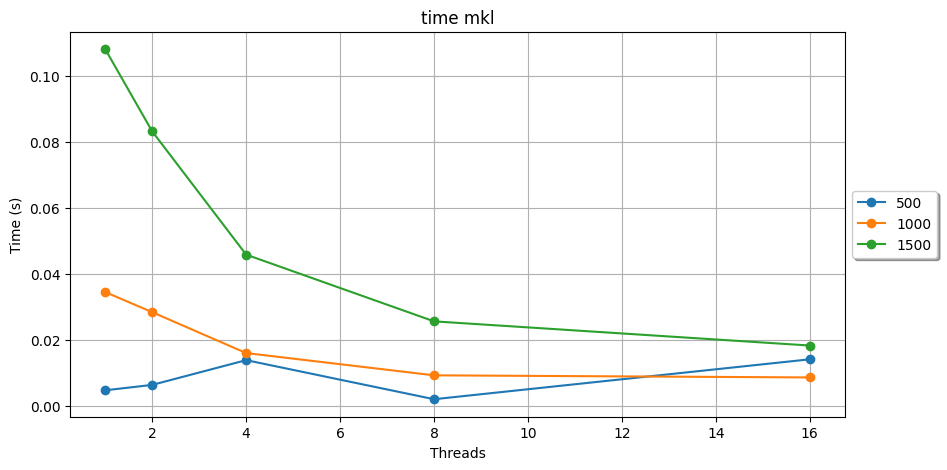

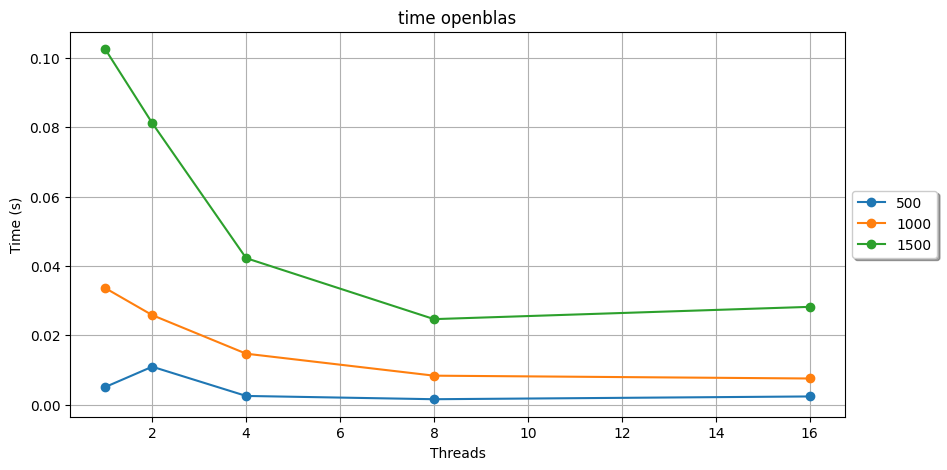

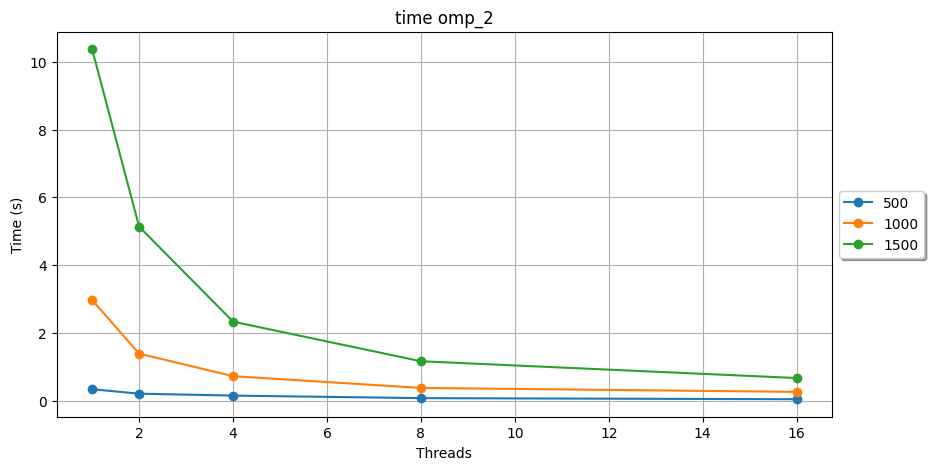

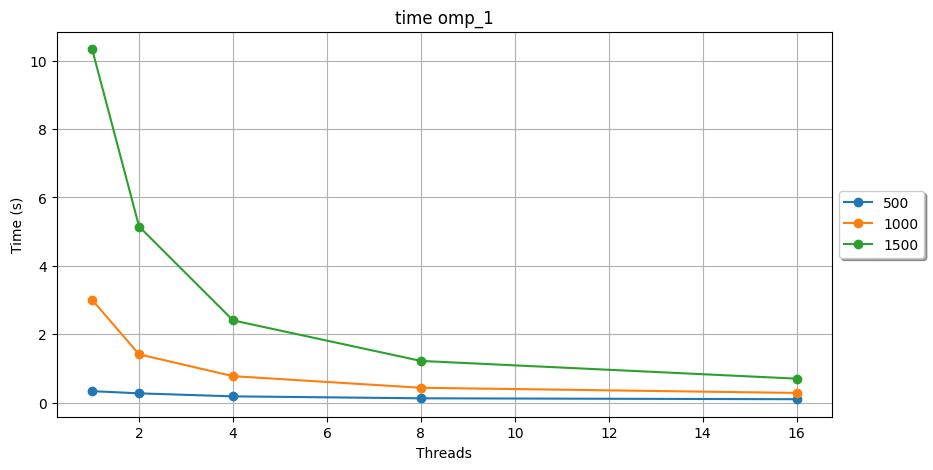

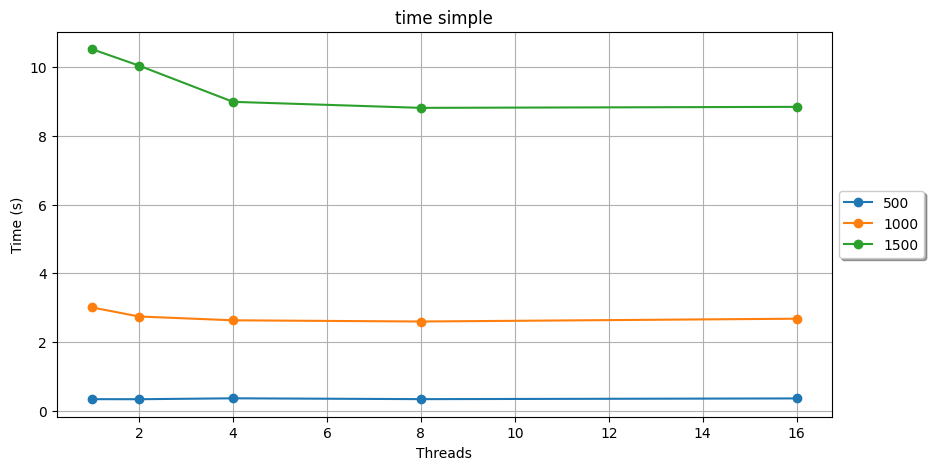

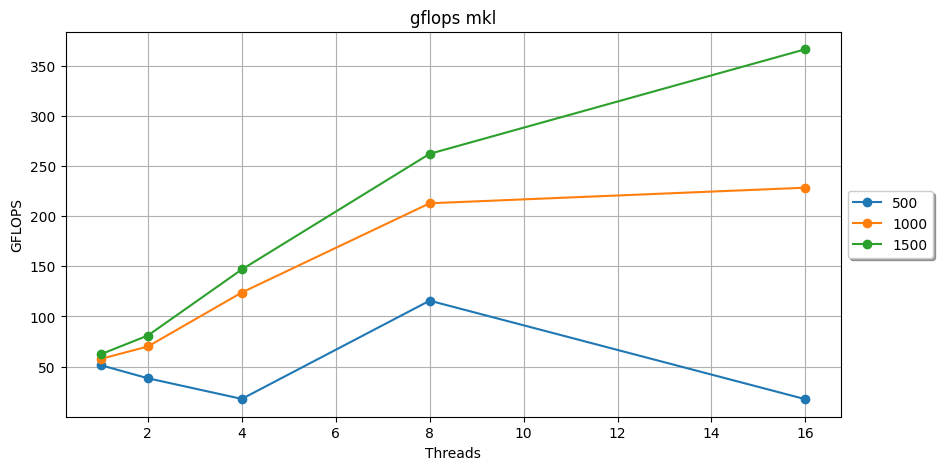

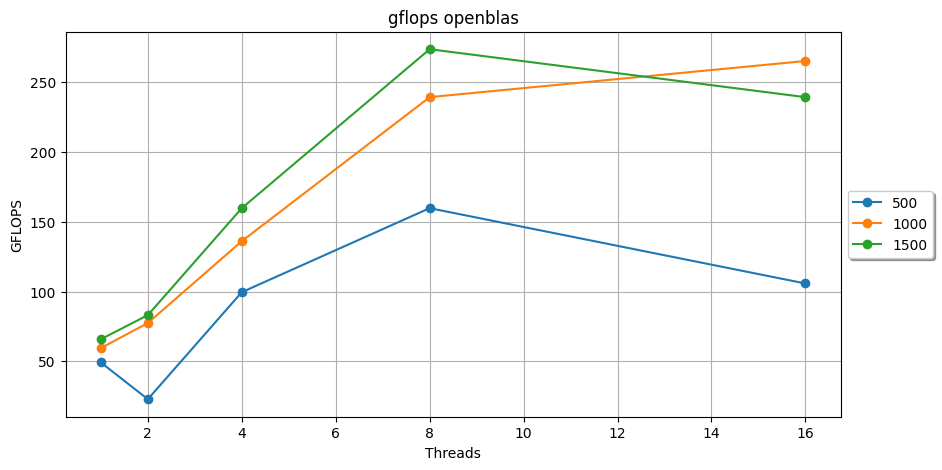

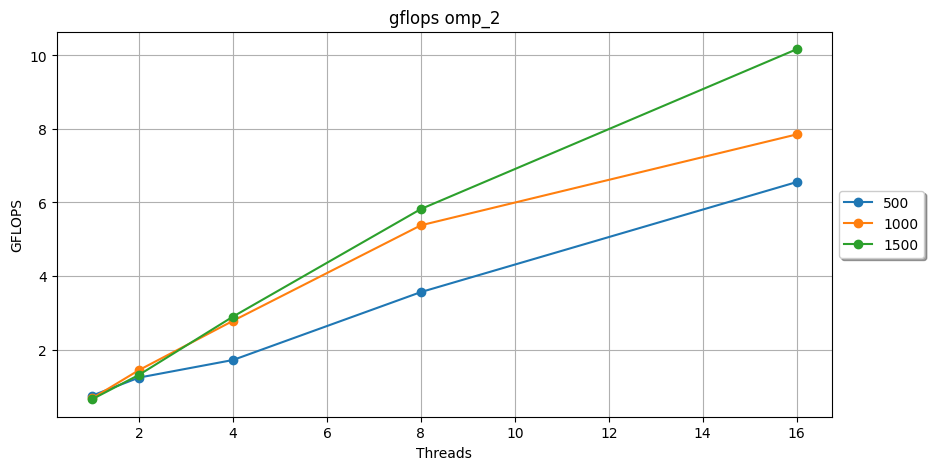

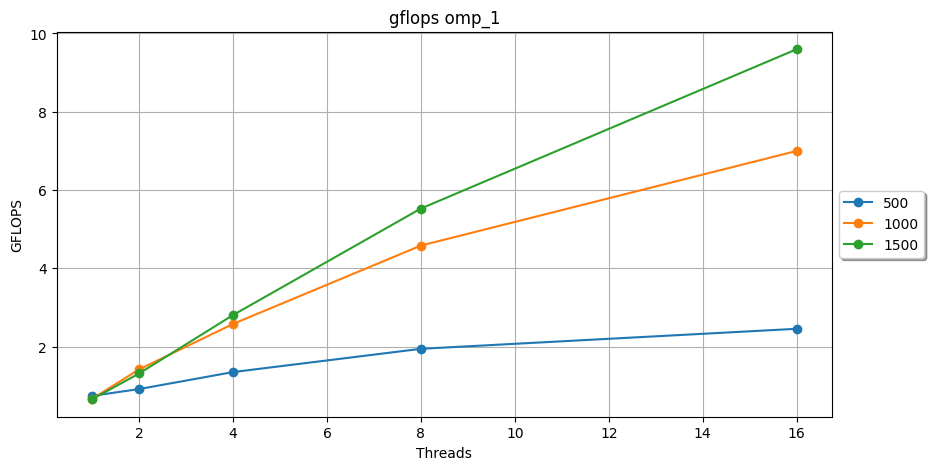

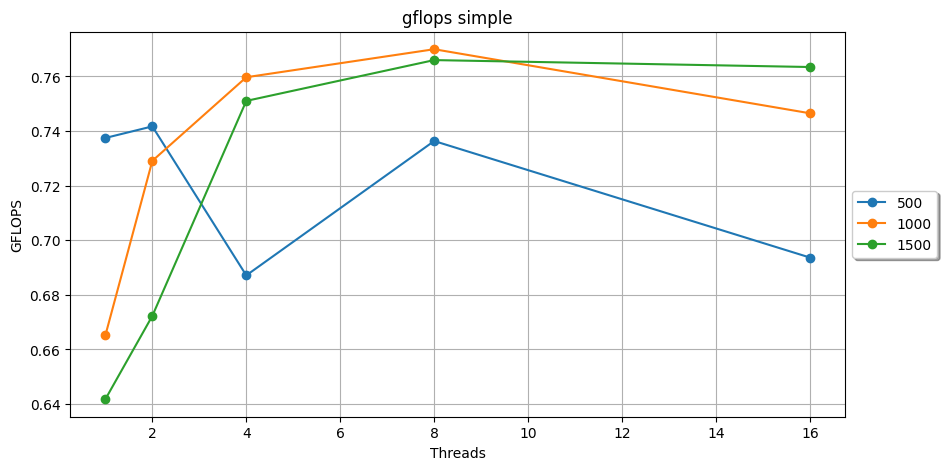

In [64]:
for title in res:
    vals_dict = res[title]
    for key in vals_dict:
        vals = vals_dict[key]
        plt.figure(figsize=(10,5))
        plt.title(title + " " + key)
        plt.xlabel("Threads")
        if title == "time":
            plt.ylabel("Time (s)")
        elif title == "gflops":
            plt.ylabel("GFLOPS")
        for i in range(len(mat_sizes)):
            plt.plot(threads_arr, vals[i], linestyle='-', marker='o',  label=mat_sizes[i])
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
        plt.grid(True)
        plt.show()

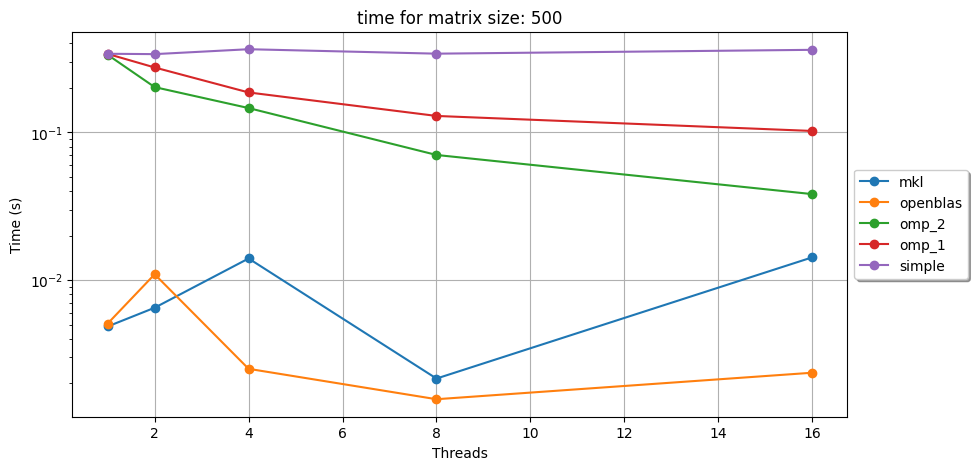

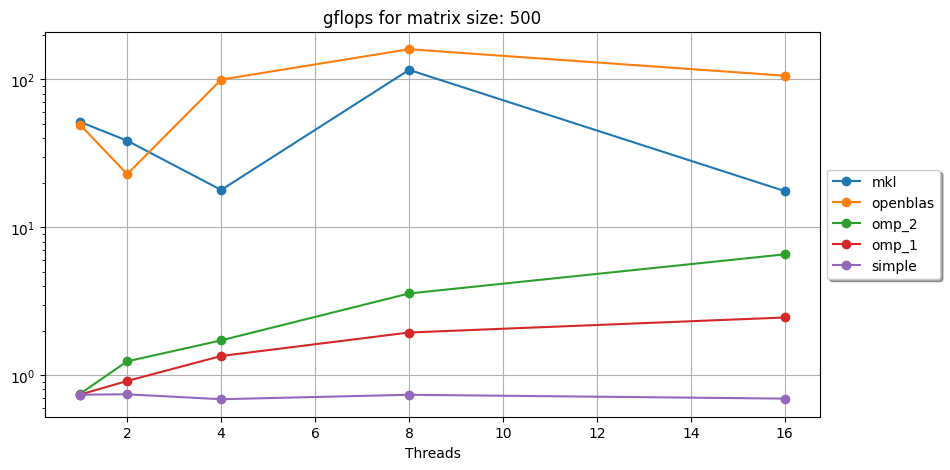

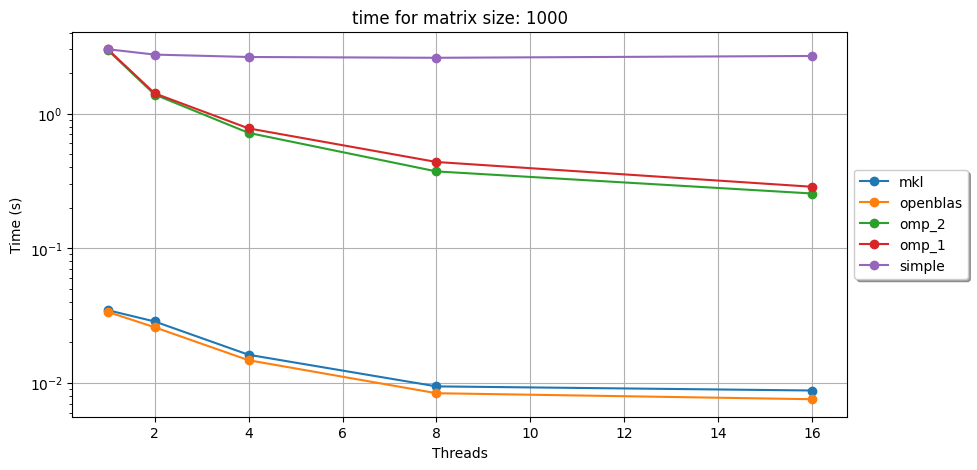

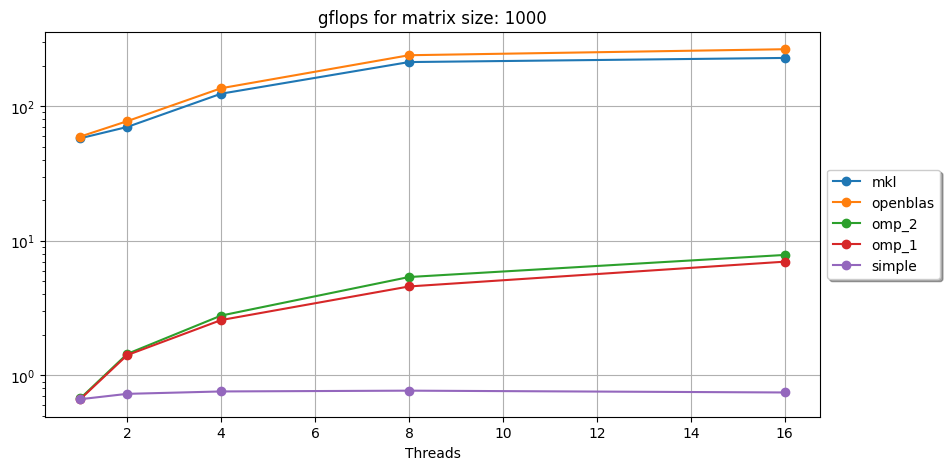

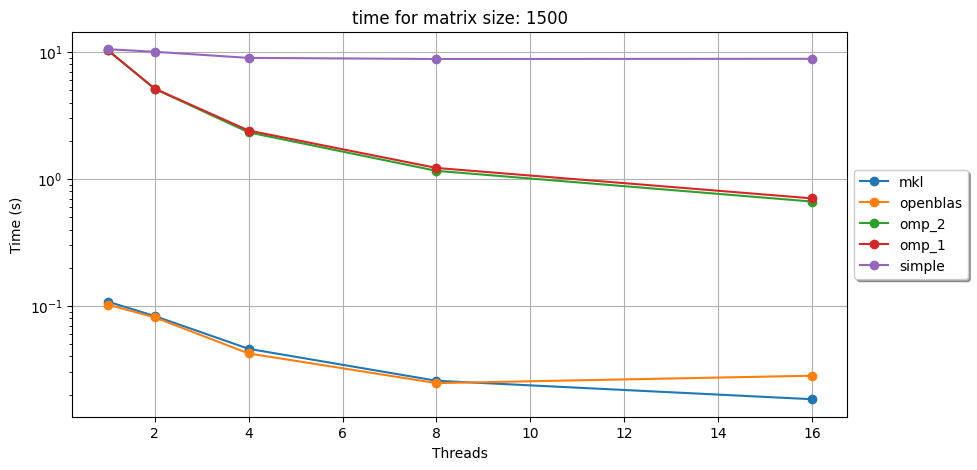

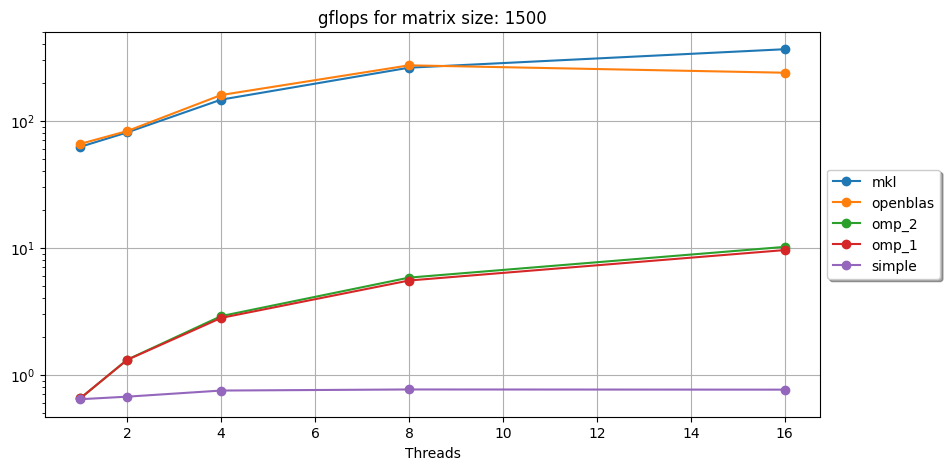

In [63]:

for i in range(len(mat_sizes)):
    for title in res:
        plt.figure(figsize=(10,5))
        plt.title(f"{title} for matrix size: {mat_sizes[i]}")
        plt.xlabel("Threads")
        if title == "time":
            plt.ylabel("Time (s)")
        elif title == "glops":
            plt.ylabel("GFLOPS")
        plt.yscale("log")
        vals_dict = res[title]
        for key in vals_dict:
            vals = vals_dict[key]
            
            plt.plot(threads_arr, vals[i], linestyle='-', marker='o',  label=key)

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
          ncol=1, fancybox=True, shadow=True)
        plt.grid(True)
        plt.show()

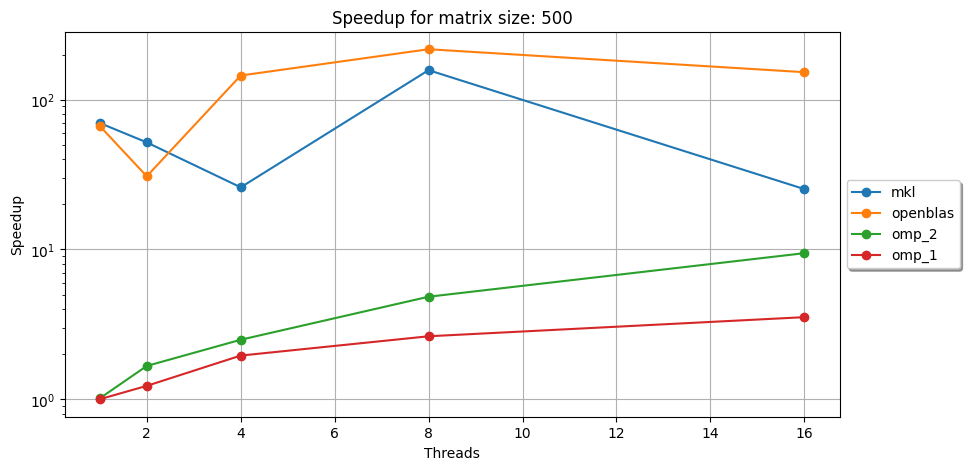

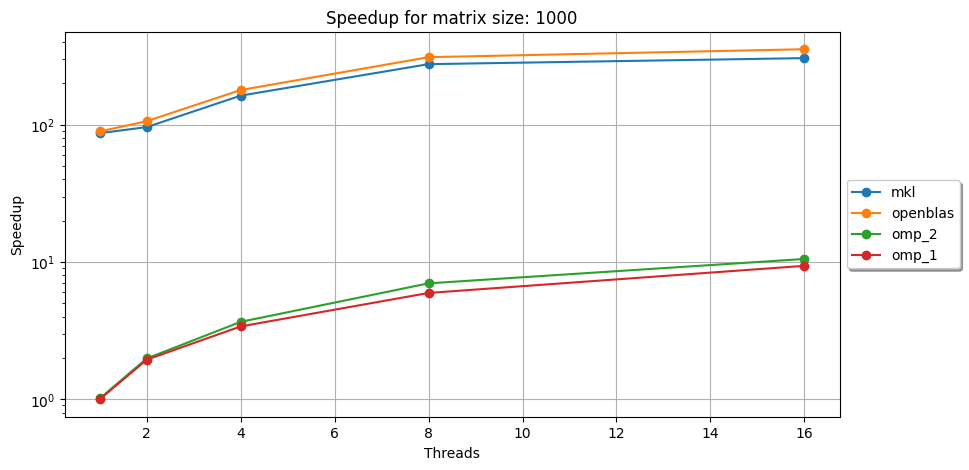

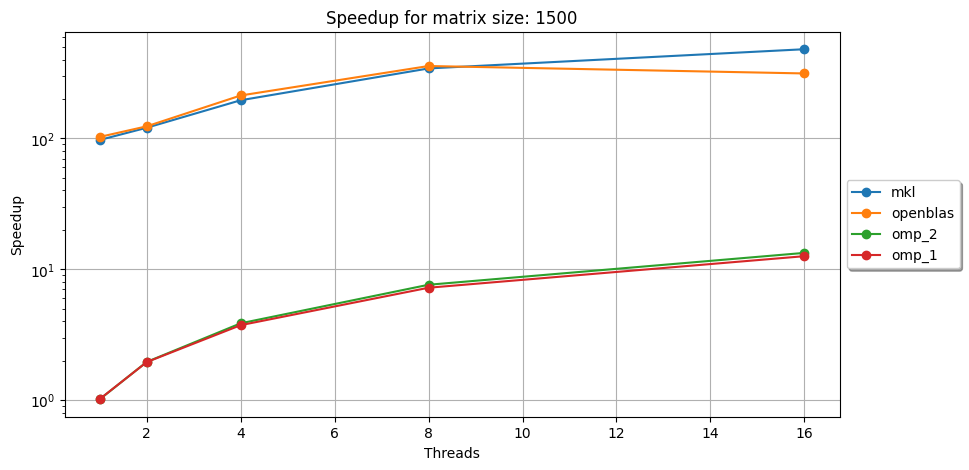

In [62]:
for i in range(len(mat_sizes)):
    title = "time"
    plt.figure(figsize=(10,5))
    plt.title(f"Speedup for matrix size: {mat_sizes[i]}")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    plt.yscale("log")
    vals_dict = res[title]
    simple_time = vals_dict["simple"][i]
    for key in vals_dict:
        if key == "simple":
            continue
        vals = vals_dict[key]
        plt.plot(threads_arr , simple_time / vals[i] , linestyle='-', marker='o',  label=key)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
        ncol=1, fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

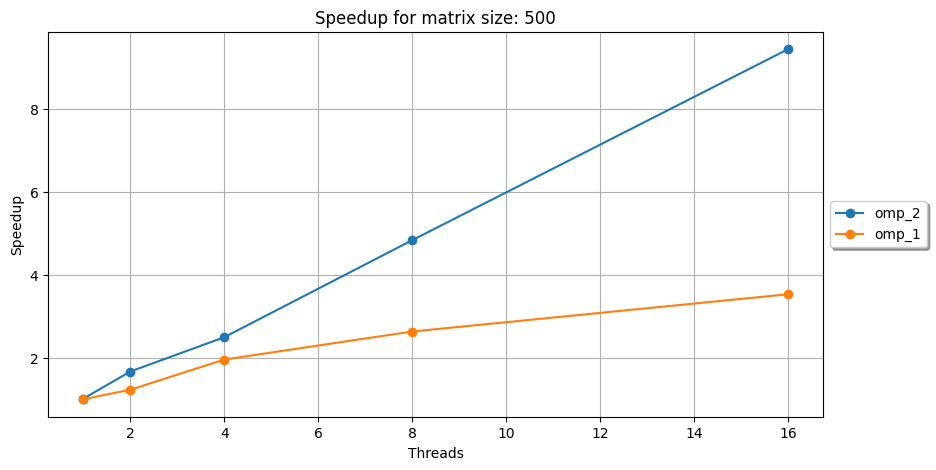

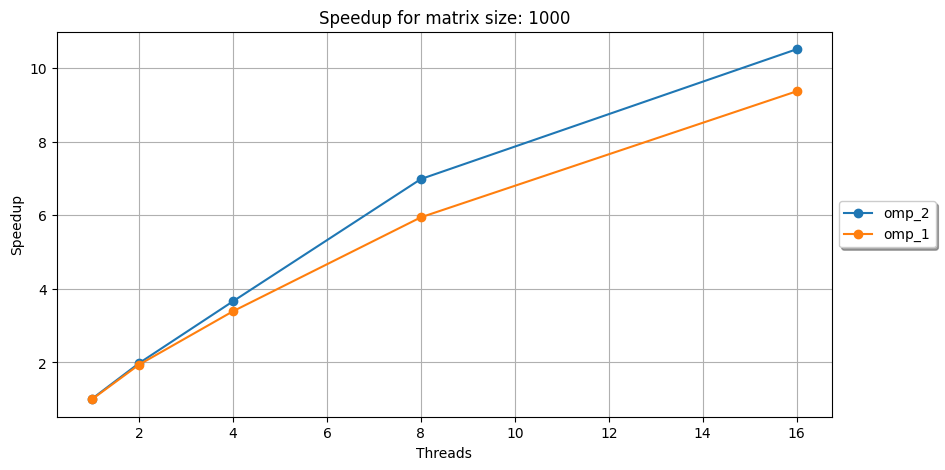

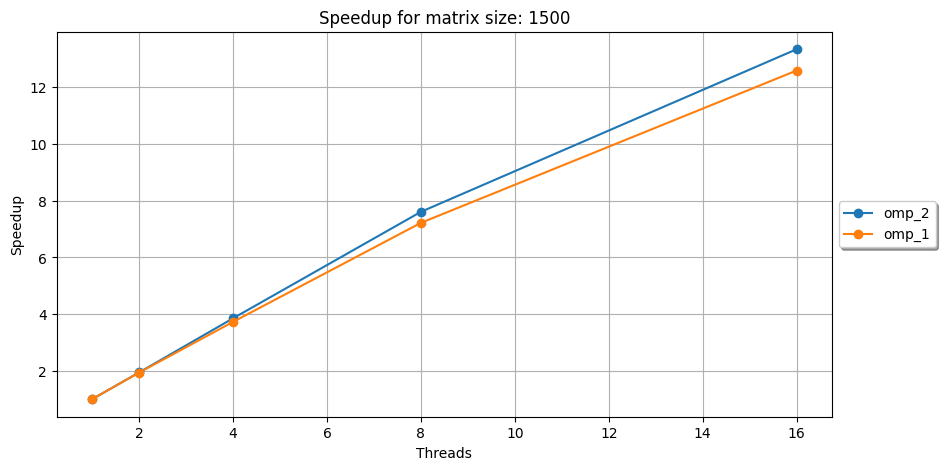

In [61]:
for i in range(len(mat_sizes)):
    title = "time"
    plt.figure(figsize=(10,5))
    plt.title(f"Speedup for matrix size: {mat_sizes[i]}")
    plt.xlabel("Threads")
    plt.ylabel("Speedup")
    # plt.yscale("log")
    vals_dict = res[title]
    simple_time = vals_dict["simple"][i]
    for key in vals_dict:
        if key == "simple" or key == "openblas" or key == "mkl":
            continue
        vals = vals_dict[key]
        plt.plot(threads_arr , simple_time / vals[i] , linestyle='-', marker='o',  label=key)

    plt.grid(True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),
        ncol=1, fancybox=True, shadow=True)
    plt.show()